Problem 1: Importing The Data (ADANI.NS)

In [1]:
import yfinance as yf
import pandas as pd

In [2]:

def download_data(tickers, start, end):
  data = yf.download(tickers, start = start, end = end, progress = False)
  data = data.xs(tickers, axis = 1, level = 1)
  data.columns.name = None
  return data

eg_data = 'BEL.NS'
data = download_data(eg_data, '2022-01-01', '2023-01-01')
print(data)


YF.download() has changed argument auto_adjust default to True
                Close       High        Low       Open    Volume
Date                                                            
2022-01-03  66.765923  67.066171  66.212837  66.291845   8974341
2022-01-04  68.314568  69.231111  66.750110  67.160979  31336737
2022-01-05  67.413834  68.551624  67.192601  68.188159  11957511
2022-01-06  66.971367  67.366436  66.560499  66.686925   8820915
2022-01-07  65.754562  67.619268  65.580733  66.971361  12974964
...               ...        ...        ...        ...       ...
2022-12-26  96.029686  96.610217  91.578941  93.465668  12096095
2022-12-27  96.997238  97.674523  95.207266  96.561842  10240049
2022-12-28  96.513458  97.626146  96.029682  96.368324   9470020
2022-12-29  95.691048  96.561847  95.110517  95.304025  11367064
2022-12-30  96.658592  98.061542  96.029681  96.174815   9236774

[248 rows x 5 columns]


In [3]:
# Cleaning The Data

data.dropna(inplace = True)


print(data)
print(data.index)
# Index is already datetime

                Close       High        Low       Open    Volume
Date                                                            
2022-01-03  66.765923  67.066171  66.212837  66.291845   8974341
2022-01-04  68.314568  69.231111  66.750110  67.160979  31336737
2022-01-05  67.413834  68.551624  67.192601  68.188159  11957511
2022-01-06  66.971367  67.366436  66.560499  66.686925   8820915
2022-01-07  65.754562  67.619268  65.580733  66.971361  12974964
...               ...        ...        ...        ...       ...
2022-12-26  96.029686  96.610217  91.578941  93.465668  12096095
2022-12-27  96.997238  97.674523  95.207266  96.561842  10240049
2022-12-28  96.513458  97.626146  96.029682  96.368324   9470020
2022-12-29  95.691048  96.561847  95.110517  95.304025  11367064
2022-12-30  96.658592  98.061542  96.029681  96.174815   9236774

[248 rows x 5 columns]
DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '20

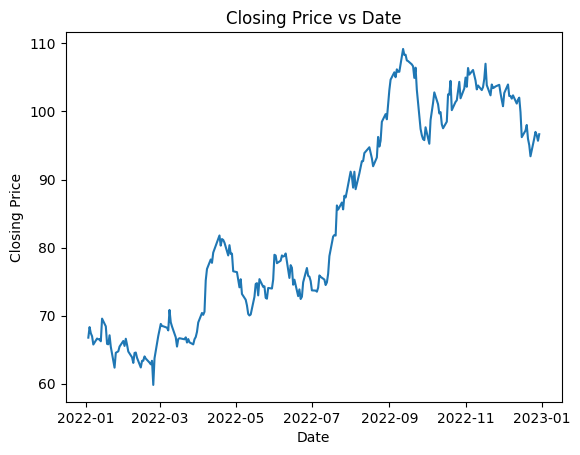

In [4]:
import matplotlib.pyplot as plt
plt.plot(data.index, data['Close'])
plt.title("Closing Price vs Date")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

Candle Chart

In [5]:
import plotly.graph_objects as go
candle_chart = go.Figure(data=
                [go.Candlestick(
                x =data.index,
                open = data['Open'],
                high = data['High'],
                low = data['Low'],
                close = data['Close'])])
candle_chart.update_layout(title=f"Closing Price vs Date for {eg_data}", xaxis_title = 'Date', yaxis_title = 'Price')
candle_chart.show()
# This is a pretty good chart

In [6]:
candle_chart.add_annotation(
    x = '2022-06-23',
    y = 72.75300,
    text = 'Morning Star',
    showarrow = True,
    arrowcolor = 'black',
    arrowhead = 1
)
candle_chart.add_annotation(
    x = '2022-09-15',
    y = 107.75300,
    text = 'Bearish Marubuzo',
    showarrow = True,
    arrowcolor = 'purple',
    arrowhead = 1
)

After the Bullish Morning Star (where we saw a red candle, a small green reversal 'star' and a large green candle), we saw the formation of a strong upward trend as expected which happened for more than two months straight.

Also in the Bearish Marubuzo, there was a large red candle engulfing the previous green candle which led to a negative trend, which was quite steep relative to previous trends.

Problem 2: Returns

In [7]:
import numpy as np
data['Daily Return'] = data['Close']/data['Close'].shift(1) - 1
data['Log_Returns'] = np.log(data['Close']/data['Close'].shift(1))
print(data)

                Close       High        Low       Open    Volume  \
Date                                                               
2022-01-03  66.765923  67.066171  66.212837  66.291845   8974341   
2022-01-04  68.314568  69.231111  66.750110  67.160979  31336737   
2022-01-05  67.413834  68.551624  67.192601  68.188159  11957511   
2022-01-06  66.971367  67.366436  66.560499  66.686925   8820915   
2022-01-07  65.754562  67.619268  65.580733  66.971361  12974964   
...               ...        ...        ...        ...       ...   
2022-12-26  96.029686  96.610217  91.578941  93.465668  12096095   
2022-12-27  96.997238  97.674523  95.207266  96.561842  10240049   
2022-12-28  96.513458  97.626146  96.029682  96.368324   9470020   
2022-12-29  95.691048  96.561847  95.110517  95.304025  11367064   
2022-12-30  96.658592  98.061542  96.029681  96.174815   9236774   

            Daily Return  Log_Returns  
Date                                   
2022-01-03           NaN          N

In [13]:
import plotly.express as px
plot1 = px.line(data, x = data.index, y = 'Daily Return', title = 'Daily Returns')
plot2 = px.line(data, x = data.index, y = 'Log_Returns', title = 'Log Returns')
plot1.show()
plot2.show()

The log and simple return are similar because they incorporate the simple fact of increasing with with increasing return and decreasing with decreasing return and their amplitude depends on the degree of return. Though they look similar, their values on y axis do differ. And on increasing the amplitude of return, as ln() function is slow to rise in comparison to simple return hence at very large values simple return goes dramatically higher than the ln returns. At small values they are practically the same. As ln(x + 1) = x for small x and simple return is also x.

In [23]:
fig = go.Figure()
fig.update_layout(title = 'Price vs Volatility', yaxis = dict(title = 'Close'), yaxis2 = dict(title = 'Rolling Std', overlaying = 'y', side = 'right'))

fig.add_trace(go.Scatter(x = data.index, y = data['Close'], opacity = 0.4, name = 'Close', yaxis = 'y1'))

data['Rolling_Std'] = data['Daily Return'].rolling(window = 14).std()

fig.add_trace(go.Scatter(x = data.index, y = data['Rolling_Std'], name = 'Rolling Std', yaxis = 'y2'))
fig.show()

Problem 3: Probability Paradoxes

Part 1: Theory vs Reality

In [9]:
from scipy.stats import binom


data['Signum_Return'] = 0
data.loc[data['Daily Return'] > 0, 'Signum_Return'] = 1
data.loc[data['Daily Return'] <= 0, 'Signum_Return'] = -1




In [10]:
prob_UP = len(data.loc[data['Signum_Return']==1])/(len(data['Signum_Return'])-1)
print(prob_UP)
# I subtracted a 1 in denominator as the initial value was a zero



0.4898785425101215


In [11]:
p_up = 0.6 #Given

#Theory
print("Theory")
print(f"Probability of exactly 6 wins is {binom.pmf(n = 10, p = p_up, k = 6)}")
print(f"Probability of atleast 8 wins is {1 - binom.cdf(n = 10, p = p_up, k = 7)}")

#Simulation
store =[]
print()
print("Simulation Results")

from numpy import random

store = random.binomial(n=10, p = p_up, size = 1000)

print(f"Probability of exactly 6 wins is {sum(store == 6)/len(store)}")
print(f"Probability of atleast 8 wins is {sum(store >= 8)/len(store)}")


#Not Used Seed



Theory
Probability of exactly 6 wins is 0.2508226559999998
Probability of atleast 8 wins is 0.16728975359999998

Simulation Results
Probability of exactly 6 wins is 0.261
Probability of atleast 8 wins is 0.165


Part 2: Paradox

In [12]:
avg_win = data.loc[data['Signum_Return'] == 1,'Daily Return'].mean()
avg_loss = data.loc[data['Signum_Return'] == -1, 'Daily Return'].mean()

print(f"Average Win-> {avg_win}")
print(f"Average Loss-> {avg_loss}")

print("Now Suppose P(UP) = 0.4")

print(f"Average Total Return is {(4*avg_win - 6*avg_loss)/10}")


Average Win-> 0.017234912134959413
Average Loss-> -0.01322811350477326
Now Suppose P(UP) = 0.4
Average Total Return is 0.014830832956847723


This shows that even if probability of win trades is lesser, i.e. taken 40%, still the trades shows positive return because, not only the no. of win trades count but their amlplitude also.

Towards Part 3:

Expected Value of returns in long term is (0.6 X 100) + (0.4 X 150) = 0.

I would not take this bet as in long term, this yields no profitable bet. And in short term, losses are greater than profits so if I run in to some losses I need many wins to recover, which might make me run into long term which eventually yields no return. So this is an ignorable bet.

I am beginning to get interested with the topic.

The Buzzword which really got me interested into this project was the timeseries analysis and applying Bayesian techniques. Though seriously I don't have the faintest idea how Bayesian probability I studied in JEE days have any use here, but I had been studying Time Series Analysis for quite a few days so it caught one of my eyes.

I am optimistic with this project as this is one of the projects where the course is not so super heavy as in other summer projects and I can hope to complete it.